<a href="https://colab.research.google.com/github/VaasuDevanS/python-notebooks/blob/main/30DayMapChallenge/2023/Day01_Points.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Indigenous Geographical Names
The Indigenous Geographical Names dataset presents an extract from the Canadian Geographical Names Data Base (CGNDB) of geographical names with roots in Indigenous cultures. These geographical names reflect heritage, language, personal names, and cultural practices.
https://open.canada.ca/data/en/dataset/f426088b-dde4-4502-9600-6bfa37556f8e

In [ ]:
!pip install contextily

In [2]:
import contextily as cx
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv(
    'https://ftp.maps.canada.ca/pub/nrcan_rncan/vector/geobase_cgn_toponyme/prov_csv_eng/cgn_indg_csv_eng.zip'
)

df = df[df['Province - Territory'] == 'New Brunswick']

In [4]:
gdf = gpd.GeoDataFrame(
    data=df,
    geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']),
    crs='EPSG:4326'
)

gdf = gdf.to_crs('EPSG:2953')

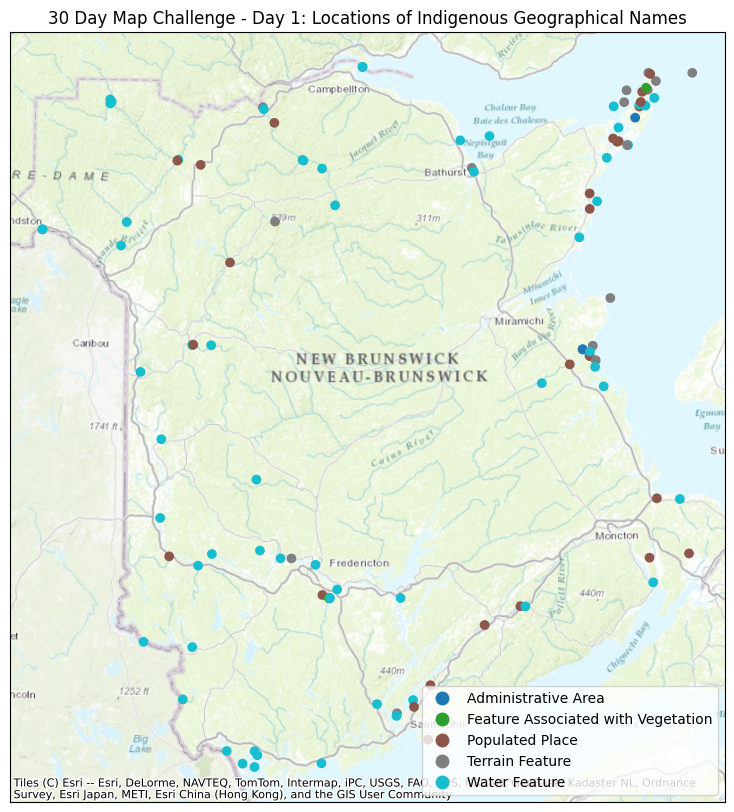

In [5]:
ax = gdf.plot(
    column='Generic Category',
    figsize=(10, 10),
    legend=True,
    legend_kwds={'loc': 'lower right'}
)

cx.add_basemap(ax, crs=gdf.crs.to_string(), source=cx.providers.Esri.WorldTopoMap)
plt.title('30 Day Map Challenge - Day 1: Locations of Indigenous Geographical Names')
plt.xticks([]), plt.yticks([])
plt.savefig('day01.png', dpi=300, bbox_inches='tight');